
# Introduction


In this project we are going to analyse the tourist that comes in india from different countries in year 2000 to 2015, we take the data from data.gov.in. Also we predict the rate of tourist that comes in future by using previous data and also plot the graph for visualization.

In this notebook, I'm going to go over a basic Python data analysis pipeline from start to finish to show you what a typical data science workflow looks like.

I will be following along with the data analysis checklist from The Elements of Data Analytic Style, which I strongly recommend reading as a free and quick guidebook to performing outstanding data analysis.

This notebook is intended to be a public resource. As such, if you see any glaring inaccuracies or if a critical topic is missing, please feel free to point it out or (preferably) submit a pull request to improve the notebook.

# Required Libraries

This notebook uses several Python packages . The primary libraries that we'll be using are:

 1. NumPy: Provides a fast numerical array structure and helper functions.
 2. pandas: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
 3. scikit-learn: The essential Machine Learning package in Python.
 4. matplotlib: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
 5. Seaborn: Advanced statistical plotting library.


We'll start with the reading in the data

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

data = pd.read_csv("C:/Users/Harshit/Desktop/tourist.csv")
read = pd.read_csv("C:/Users/Harshit/Desktop/tourist.csv")

data.drop(index=[19,18],inplace=True)

In [5]:
data.head()

,Name of Countries,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,USA,329147,348182,410803,526120,611165,696739,799062,804933,827140,931292,980688,1039947,1085309,1118983,1213624
1,UK,405472,387846,430917,555907,651803,734240,796191,776530,769251,759494,798249,788170,809444,942562,867601
2,BANGLADESH,431312,435867,454611,477446,456371,484401,480240,541884,468899,431962,463543,487397,524923,838860,1133879
3,SRILANKA,112813,108008,109098,128711,136400,154813,204084,218805,239995,266515,305853,296983,262345,301601,299513
4,CANADA,88600,93598,107671,135884,157643,176567,208214,222364,224069,242372,259017,256021,255222,268485,281306


In [5]:
data.describe()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,2.537282e+05,2.416138e+05,2.761149e+05,3.500022e+05,3.918610e+05,4.447167e+05,5.081504e+05,5.282603e+05,5.167699e+05,5.775692e+05,6.309222e+05,6.577745e+05,6.967601e+05,7.679099e+05,8.027133e+05
std,5.602595e+05,5.294082e+05,6.045280e+05,7.630126e+05,8.627594e+05,9.781947e+05,1.117419e+06,1.162218e+06,1.137328e+06,1.270833e+06,1.387661e+06,1.445672e+06,1.530479e+06,1.687631e+06,1.766240e+06
min,1.390100e+04,2.946000e+03,1.036400e+04,3.344200e+04,4.197800e+04,4.662300e+04,5.003700e+04,5.806500e+04,5.313700e+04,5.173900e+04,4.864000e+04,5.984600e+04,9.395100e+04,9.158900e+04,8.809100e+04
25%,4.129700e+04,3.519550e+04,4.159375e+04,5.883425e+04,6.841000e+04,8.192500e+04,9.170675e+04,8.976275e+04,9.340500e+04,1.067088e+05,1.191038e+05,1.299328e+05,1.365528e+05,1.446522e+05,1.540995e+05
50%,6.894000e+04,6.172850e+04,7.380900e+04,9.062050e+04,9.967900e+04,1.145795e+05,1.407315e+05,1.457805e+05,1.422085e+05,1.743620e+05,2.008605e+05,2.110600e+05,2.455140e+05,2.429315e+05,2.395840e+05
75%,1.668965e+05,1.680515e+05,1.845242e+05,2.212745e+05,2.323250e+05,2.535255e+05,2.762205e+05,3.022440e+05,2.972210e+05,3.078768e+05,3.452755e+05,3.445865e+05,3.279895e+05,4.359158e+05,4.415350e+05
max,2.537282e+06,2.384364e+06,2.726214e+06,3.456698e+06,3.918610e+06,4.447167e+06,5.081504e+06,5.282603e+06,5.167699e+06,5.775692e+06,6.309222e+06,6.577745e+06,6.967601e+06,7.679099e+06,8.027133e+06


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 16 columns):
Name of Countries    19 non-null object
2001                 19 non-null int64
2002                 19 non-null int64
2003                 19 non-null int64
2004                 19 non-null int64
2005                 19 non-null int64
2006                 19 non-null int64
2007                 19 non-null int64
2008                 19 non-null int64
2009                 19 non-null int64
2010                 19 non-null int64
2011                 19 non-null int64
2012                 19 non-null int64
2013                 19 non-null int64
2014                 19 non-null int64
2015                 19 non-null int64
dtypes: int64(15), object(1)
memory usage: 2.4+ KB


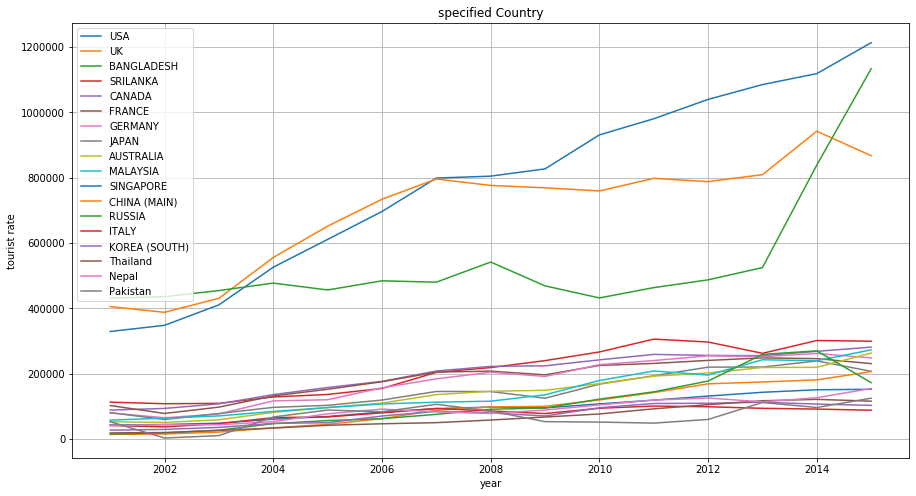

In [51]:
z= data.iloc[:,0].values
z_real = np.array(z)

x= [2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
real_x = np.array(x)

real_y= data.iloc[:,1::].values
real_y= np.array(real_y)



plt.rcParams['figure.figsize'] = [15, 8]
for i in range(0,18):
    plt.plot(real_x, real_y[i, :], label=z_real[i])

plt.legend()
plt.xlabel('year')
plt.ylabel('tourist rate')
plt.title('specified Country')
plt.grid()
plt.show()

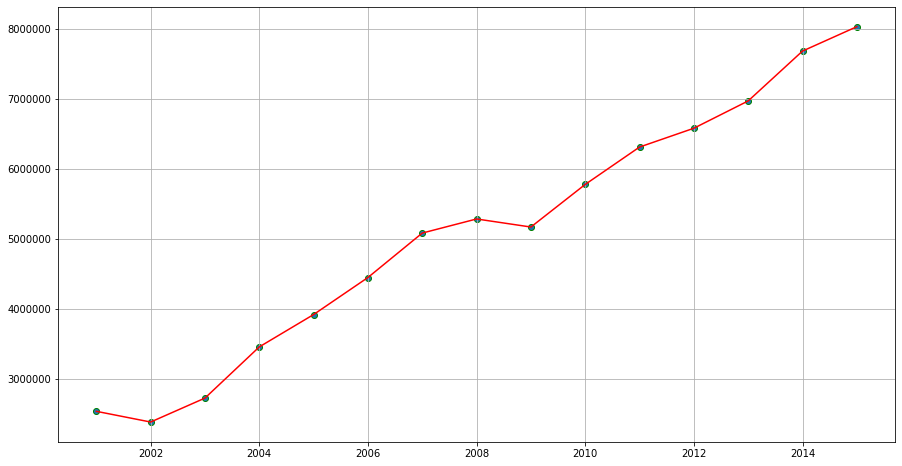

In [24]:
x= [2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
real_x = np.array(x)


real_y = read.iloc[19,1:].values
real_y= np.array(real_y)

plt.scatter(real_x,real_y,edgecolors='green',marker='o')
plt.plot(real_x,real_y,color="red")
plt.grid()
plt.show()


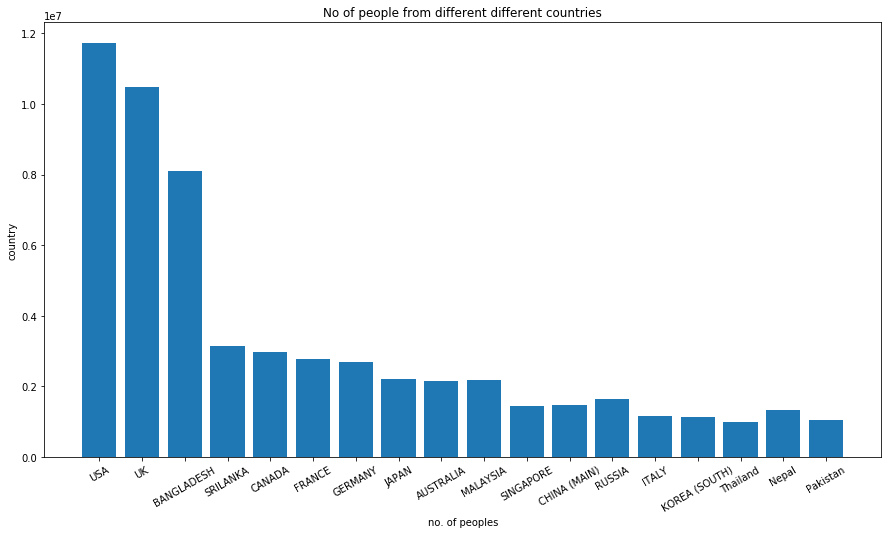

In [50]:
real_x = data[['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].sum(axis=1)
real_x = np.array(real_x)
real_x.reshape(-1,1)

real_y=  data.iloc[:,0].values
real_y = np.array(real_y)
real_y.reshape(-1,1)


index = np.arange(len(real_y))
plt.bar(index, real_x)
plt.xlabel('no. of peoples')
plt.ylabel('country')
plt.xticks(index, real_y,rotation=30)
plt.title('No of people from different different countries')
plt.show()